In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from wordcloud import WordCloud, STOPWORDS

In [2]:
country_code = pd.read_excel('Country-Code.xlsx')
country_code.columns = map(str.lower, country_code.columns)
country_code.columns = country_code.columns.str.replace('\s+', '_')
country_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
country_code    15 non-null int64
country         15 non-null object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [3]:
zomato = pd.read_csv('zomato.csv', encoding="ISO-8859-1")
zomato.columns = map(str.lower, zomato.columns)
zomato.columns = zomato.columns.str.replace('\s+', '_')
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
restaurant_id           9551 non-null int64
restaurant_name         9551 non-null object
country_code            9551 non-null int64
city                    9551 non-null object
address                 9551 non-null object
locality                9551 non-null object
locality_verbose        9551 non-null object
longitude               9551 non-null float64
latitude                9551 non-null float64
cuisines                9542 non-null object
average_cost_for_two    9551 non-null int64
currency                9551 non-null object
has_table_booking       9551 non-null object
has_online_delivery     9551 non-null object
is_delivering_now       9551 non-null object
switch_to_order_menu    9551 non-null object
price_range             9551 non-null int64
aggregate_rating        9551 non-null float64
rating_color            9551 non-null object
rating_text             9551 non-null o

In [4]:
# Joining to get country names
full = zomato.merge(country_code, on='country_code')
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
restaurant_id           9551 non-null int64
restaurant_name         9551 non-null object
country_code            9551 non-null int64
city                    9551 non-null object
address                 9551 non-null object
locality                9551 non-null object
locality_verbose        9551 non-null object
longitude               9551 non-null float64
latitude                9551 non-null float64
cuisines                9542 non-null object
average_cost_for_two    9551 non-null int64
currency                9551 non-null object
has_table_booking       9551 non-null object
has_online_delivery     9551 non-null object
is_delivering_now       9551 non-null object
switch_to_order_menu    9551 non-null object
price_range             9551 non-null int64
aggregate_rating        9551 non-null float64
rating_color            9551 non-null object
rating_text             9551 non-null o

In [5]:
full.groupby('country').count().loc[:, ['restaurant_id']].sort_values('restaurant_id', ascending=False)

,restaurant_id
country,
India,8652
United States,434
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


In [6]:
# Filtering out Data for Indian Restaurants
data = full[full.country == 'India']
data.isnull().values.any()

False

In [7]:
data.describe()

,restaurant_id,country_code,longitude,latitude,average_cost_for_two,price_range,aggregate_rating,votes
count,8.652000e+03,8652.0,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000
mean,8.657085e+06,1.0,72.856786,26.420652,623.370319,1.721683,2.523324,137.212552
std,8.959437e+06,0.0,18.017536,6.976576,595.676124,0.852544,1.510986,428.039513
min,5.300000e+01,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.007402e+05,1.0,77.098797,28.491425,300.000000,1.000000,2.100000,4.000000
50%,2.200006e+06,1.0,77.203468,28.569869,450.000000,2.000000,3.100000,24.000000
75%,1.836120e+07,1.0,77.285356,28.637857,700.000000,2.000000,3.600000,100.000000
max,1.850065e+07,1.0,91.806493,35.000000,8000.000000,4.000000,4.900000,10934.000000


Text(0.5, 1.0, 'votes')

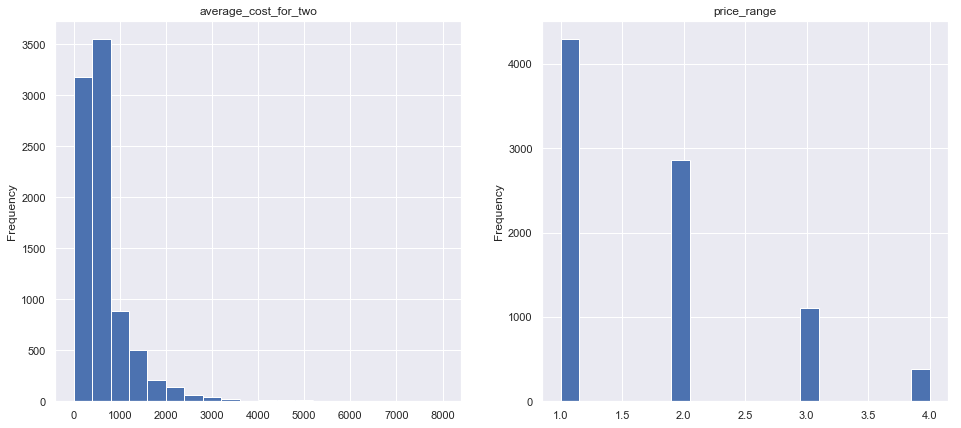

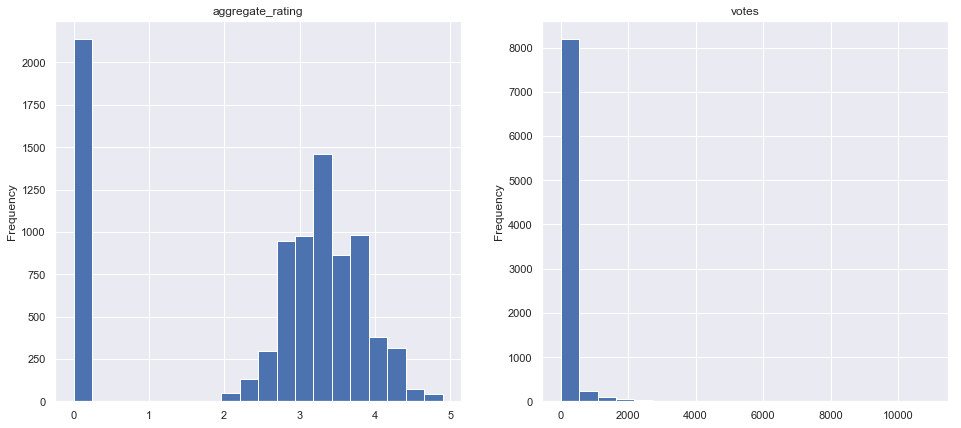

In [8]:
col_list = ['average_cost_for_two', 'price_range', 'aggregate_rating', 'votes']

fig, axes = plt.subplots(1, 2)

data.average_cost_for_two.plot.hist(ax=axes[0], figsize=(16,7), bins=20)
axes[0].set_title('average_cost_for_two')

data.price_range.plot.hist(ax=axes[1], figsize=(16,7), bins=20)
axes[1].set_title('price_range')

fig, axes = plt.subplots(1, 2)

data.aggregate_rating.plot.hist(ax=axes[0], figsize=(16,7), bins=20)
axes[0].set_title('aggregate_rating')

data.votes.plot.hist(ax=axes[1], figsize=(16,7), bins=20)
axes[1].set_title('votes')

Text(0.5, 1.0, 'Word Cloud of Cities')

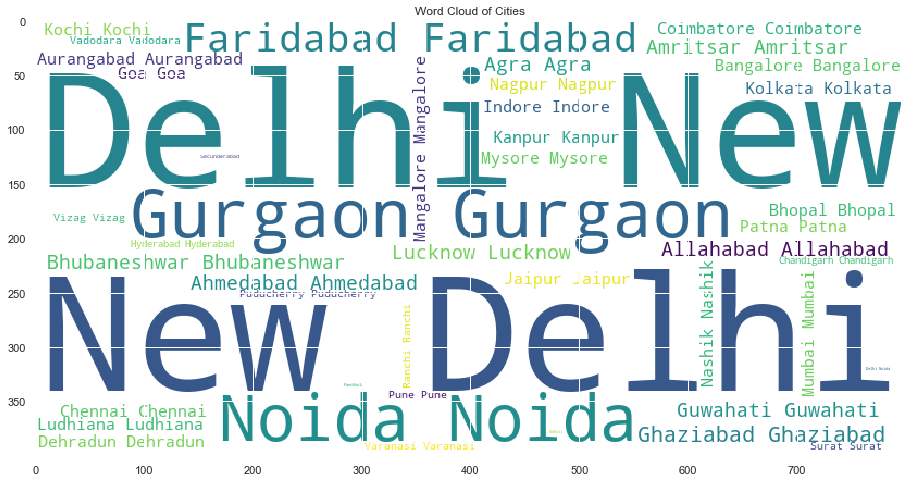

In [9]:
wordcloud = WordCloud(background_color='white',width=800, height=400).generate(' '.join(data['city']))
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.title('Word Cloud of Cities')

Text(0.5, 1.0, 'Cities with most number of restaurants - TOP 5')

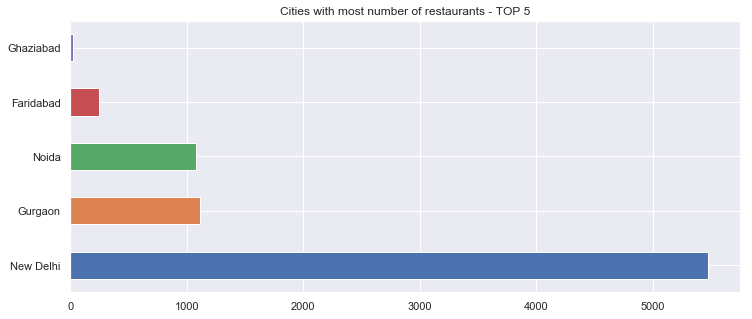

In [10]:
data['city'].value_counts().head().plot.barh(figsize=(12,5))
plt.title("Cities with most number of restaurants - TOP 5")

In [11]:
data[data['city']=='Noida']

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country
8033,310063,Ali Baba Caves,1,Noida,"1st Floor, Ansal Plaza Mall, Pari Chowk, Great...","Ansal Plaza Mall, Greater Noida","Ansal Plaza Mall, Greater Noida, Noida",77.528129,28.458107,"Cafe, Chinese",...,No,No,No,No,2,3.1,Orange,Average,15,India
8034,312214,Cafí© Doo Ghoont,1,Noida,"AG-13, Atrium Floor, Ansal Plaza Mall, Greater...","Ansal Plaza Mall, Greater Noida","Ansal Plaza Mall, Greater Noida, Noida",77.507456,28.463957,Cafe,...,No,Yes,No,No,2,3.4,Orange,Average,50,India
8035,309641,Knights Chaska,1,Noida,"201 to 207, 2nd Floor, Ansal Plaza Mall, Great...","Ansal Plaza Mall, Greater Noida","Ansal Plaza Mall, Greater Noida, Noida",77.507834,28.464434,"North Indian, Chinese",...,Yes,No,No,No,2,2.9,Orange,Average,6,India
8036,306688,Thirsty Scholar Cafe,1,Noida,"SF-256, 2nd Floor, Ansal Plaza Mall, Near Pari...","Ansal Plaza Mall, Greater Noida","Ansal Plaza Mall, Greater Noida, Noida",77.507701,28.464201,Cafe,...,No,No,No,No,1,3.2,Orange,Average,45,India
8037,18440427,Savoury Street,1,Noida,"GF-37, 1st Floor, Ansal Plaza Mall, Greater No...","Ansal Plaza Mall, Greater Noida","Ansal Plaza Mall, Greater Noida, Noida",77.507701,28.464201,"North Indian, Continental, Italian",...,No,No,No,No,2,0.0,White,Not rated,3,India
8038,312573,JSB Evergreen Snack & Sweets,1,Noida,"Brahmaputra Shopping Complex, Sector 29, Noida",Brahmaputra Shopping Complex,"Brahmaputra Shopping Complex, Noida",77.332577,28.569899,"North Indian, Chinese, Fast Food, Street Food",...,No,No,No,No,1,3.1,Orange,Average,47,India
8039,7983,221 B Baker Street,1,Noida,"10, Brahmaputra Shoping Complex, Sector 29, Noida",Brahmaputra Shopping Complex,"Brahmaputra Shopping Complex, Noida",77.332667,28.570356,Bakery,...,No,Yes,No,No,1,3.5,Yellow,Good,94,India
8040,302541,Kapoors Balle Balle,1,Noida,"K-2, Brahmaputra Shopping Complex, Sector 29, ...",Brahmaputra Shopping Complex,"Brahmaputra Shopping Complex, Noida",77.332894,28.569736,"North Indian, Chinese",...,No,Yes,No,No,1,3.7,Yellow,Good,331,India
8041,7992,Lakshmi Coffee House,1,Noida,"Brahmaputra Shopping Complex, Sector 29, Noida",Brahmaputra Shopping Complex,"Brahmaputra Shopping Complex, Noida",77.332667,28.570087,South Indian,...,No,No,No,No,1,3.8,Yellow,Good,603,India
8042,3695,Geoffrey's,1,Noida,"16-A, Centre Stage Mall, Sector 18, Noida","Centre Stage Mall, Sector 18","Centre Stage Mall, Sector 18, Noida",77.323156,28.568121,"Asian, Continental, Italian, North Indian",...,Yes,No,No,No,4,3.0,Orange,Average,579,India


In [12]:
data[data['city']=='Dehradun']

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country
845,3500012,The Punjabi Essence Restaurant,1,Dehradun,"27 B, Near Premier Plaza, Rajpur Road, Chukkuw...",Chukkuwala,"Chukkuwala, Dehradun",0.000000,0.000000,"North Indian, Chinese",...,No,No,No,No,3,3.6,Yellow,Good,102,India
846,3500007,Tirupati Restaurant,1,Dehradun,"27 B, Rajpur Road, Opposite St. Joseph's Acade...",Chukkuwala,"Chukkuwala, Dehradun",0.000000,0.000000,"South Indian, North Indian, Chinese",...,No,No,No,No,3,3.8,Yellow,Good,115,India
847,3500017,Anandam,1,Dehradun,"69, Krishna Tower, Rajpur Road, Hathibarkala S...",Hathibarkala Salwala,"Hathibarkala Salwala, Dehradun",78.053162,30.335259,"Desserts, North Indian, Chinese, South Indian,...",...,No,No,No,No,3,3.9,Yellow,Good,141,India
848,3500018,Town Table Restaurant,1,Dehradun,"101, Rajpur Road, Hathibarkala Salwala, Dehradun",Hathibarkala Salwala,"Hathibarkala Salwala, Dehradun",78.060221,30.340722,"North Indian, Chinese, Continental",...,No,No,No,No,4,3.9,Yellow,Good,173,India
849,3500011,Kalsang Friends Corner,1,Dehradun,"88 A, Opposite Osho, Chander Lok Colony, Rajpu...",Hathibarkala Salwala,"Hathibarkala Salwala, Dehradun",78.062543,30.346994,"Chinese, Thai, Tibetan",...,No,No,No,No,3,4.2,Green,Very Good,406,India
850,18416632,The Great Indian Pub,1,Dehradun,"138/345, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068022,30.361281,North Indian,...,No,No,No,No,4,4.9,Dark Green,Excellent,50,India
851,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",...,No,No,No,No,1,4.3,Green,Very Good,63,India
852,18408585,Punjab Grill,1,Dehradun,"Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.067079,30.359722,"Mughlai, North Indian",...,No,No,No,No,4,4.0,Green,Very Good,98,India
853,3500059,TBistro,1,Dehradun,"Saina Inn, 3, Old Survey Road, Karanpur, Dehradun",Karanpur,"Karanpur, Dehradun",78.054222,30.332735,"North Indian, Chinese",...,No,No,No,No,3,3.8,Yellow,Good,230,India
854,3500081,Y Cafe & Restaurant,1,Dehradun,"Hotel White House, Behind St. Joseph's Academy...",Karanpur,"Karanpur, Dehradun",78.049117,30.328174,Cafe,...,No,No,No,No,3,4.0,Green,Very Good,94,India


In [13]:
data[data['city']=='Allahabad']

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country
665,2400020,Aryan Family's Delight,1,Allahabad,"Ground Floor, Vinayak City Centre, Sardar Pate...",Civil Lines,"Civil Lines, Allahabad",81.834502,25.454648,"North Indian, South Indian, Fast Food",...,No,No,No,No,3,3.4,Orange,Average,57,India
666,2400148,Bean Here,1,Allahabad,"Vinayak Pushp, 77 Elgin Road, Near Florista, C...",Civil Lines,"Civil Lines, Allahabad",81.833167,25.453436,"Cafe, Fast Food",...,No,No,No,No,2,3.3,Orange,Average,76,India
667,2400019,Bikanerwala,1,Allahabad,"2A, JMD Bhawan, Strachey Road, Civil Lines, Al...",Civil Lines,"Civil Lines, Allahabad",81.832616,25.451517,"North Indian, Street Food, Fast Food",...,No,No,No,No,3,3.2,Orange,Average,51,India
668,2400193,Dewsis,1,Allahabad,"2, MG Marg, Opposite Hanuman Mandir, Civil Lin...",Civil Lines,"Civil Lines, Allahabad",0.000000,0.000000,"North Indian, Chinese",...,No,No,No,No,3,3.4,Orange,Average,99,India
669,2400027,Friends Forever,1,Allahabad,"13/13, Sardar Patel Marg, Civil Lines, Allahabad",Civil Lines,"Civil Lines, Allahabad",81.835585,25.457687,"North Indian, Chinese",...,No,No,No,No,3,3.4,Orange,Average,83,India
670,17960073,Hotel Ravisha Continental,1,Allahabad,"57 A, Purshottamdas Tandon Marg, Civil Lines, ...",Civil Lines,"Civil Lines, Allahabad",0.000000,0.000000,"North Indian, South Indian, Chinese",...,No,No,No,No,3,3.4,Orange,Average,18,India
671,2400119,KFC,1,Allahabad,"P Square Mall, Civil Lines, Allahabad",Civil Lines,"Civil Lines, Allahabad",81.839744,25.449659,"American, Fast Food",...,No,No,No,No,3,3.4,Orange,Average,58,India
672,2400014,McDonald's,1,Allahabad,"Shop 4, 34-B, M G Marg, Civil Lines, Allahabad",Civil Lines,"Civil Lines, Allahabad",81.834279,25.450329,Fast Food,...,No,No,No,No,2,3.3,Orange,Average,53,India
673,2400403,Pind Balluchi,1,Allahabad,"5-A, Sardar Patel Marg, Civil Lines, Allahabad",Civil Lines,"Civil Lines, Allahabad",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,3,3.2,Orange,Average,6,India
674,2400349,Pizza Hut,1,Allahabad,"31/31, Sardar Patel Marg, Civil Lines, Allahabad",Civil Lines,"Civil Lines, Allahabad",0.000000,0.000000,"Italian, Pizza",...,No,No,No,No,3,3.4,Orange,Average,35,India


Text(0.5, 1.0, 'Word Cloud of cuisines')

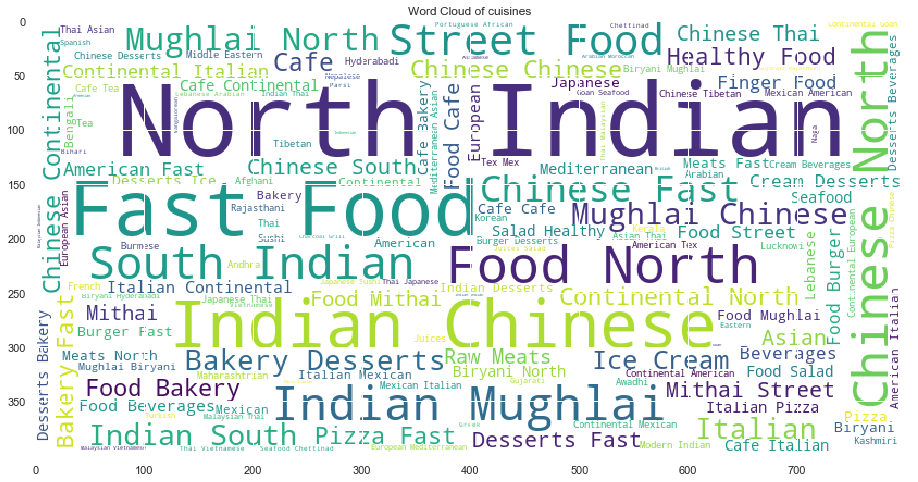

In [14]:
wordcloud = WordCloud(background_color='white',width=800, height=400).generate(' '.join(data['cuisines']))
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.title('Word Cloud of cuisines')

Text(0.5, 1.0, 'Restaurant Distribution - Online Delivery')

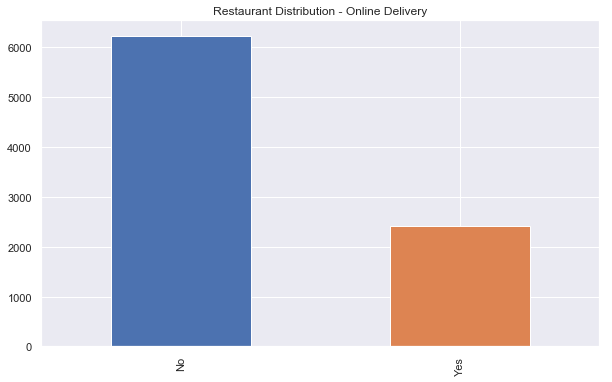

In [15]:
data.has_online_delivery.value_counts().plot.bar(figsize=(10,6))
plt.title('Restaurant Distribution - Online Delivery')

In [16]:
data

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,India
629,3400325,MoMo Cafe,1,Agra,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",0.000000,0.000000,"North Indian, European",...,No,No,No,No,4,4.0,Green,Very Good,45,India
630,3400059,Peshawri - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,"North Indian, Mughlai",...,No,No,No,No,4,4.3,Green,Very Good,133,India
631,3400060,Taj Bano - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,Mughlai,...,No,No,No,No,4,4.0,Green,Very Good,41,India
632,3400348,G Thal,1,Agra,"3/20, KPS Tower, Near Tulsi Talkies, Bypass Ro...",Khandari,"Khandari, Agra",0.000000,0.000000,"Rajasthani, Gujarati, Mughlai",...,No,No,No,No,3,3.6,Yellow,Good,59,India
633,3400072,Dawat-e-Nawab - Radisson Blu,1,Agra,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,"North Indian, Mughlai",...,No,No,No,No,4,3.8,Yellow,Good,46,India


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Average Cost Vs Aggregate Rating')

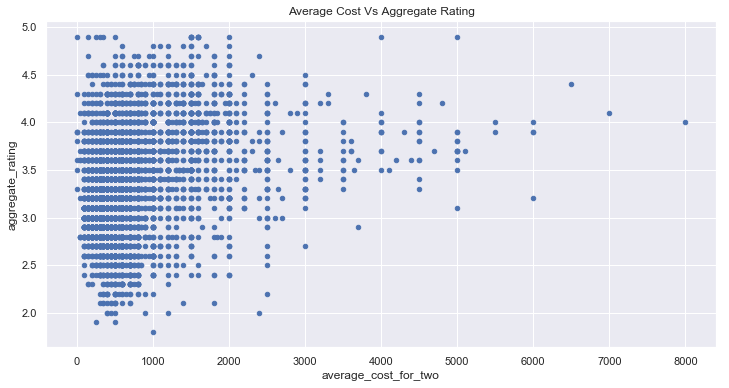

In [17]:
data[data.aggregate_rating > 0].plot(x='average_cost_for_two', y='aggregate_rating', kind='scatter', figsize=(12,6))
plt.title('Average Cost Vs Aggregate Rating')

Text(0.5, 1.0, 'Average Cost Vs Aggregate Rating')

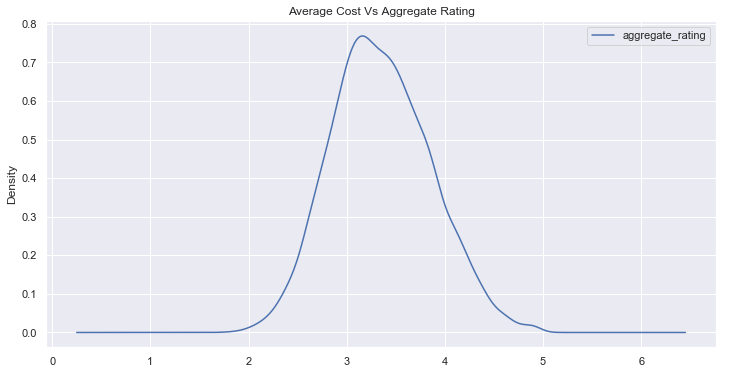

In [18]:
data[data.aggregate_rating > 0].plot(x='average_cost_for_two', y='aggregate_rating', kind='kde', figsize=(12,6))
plt.title('Average Cost Vs Aggregate Rating')

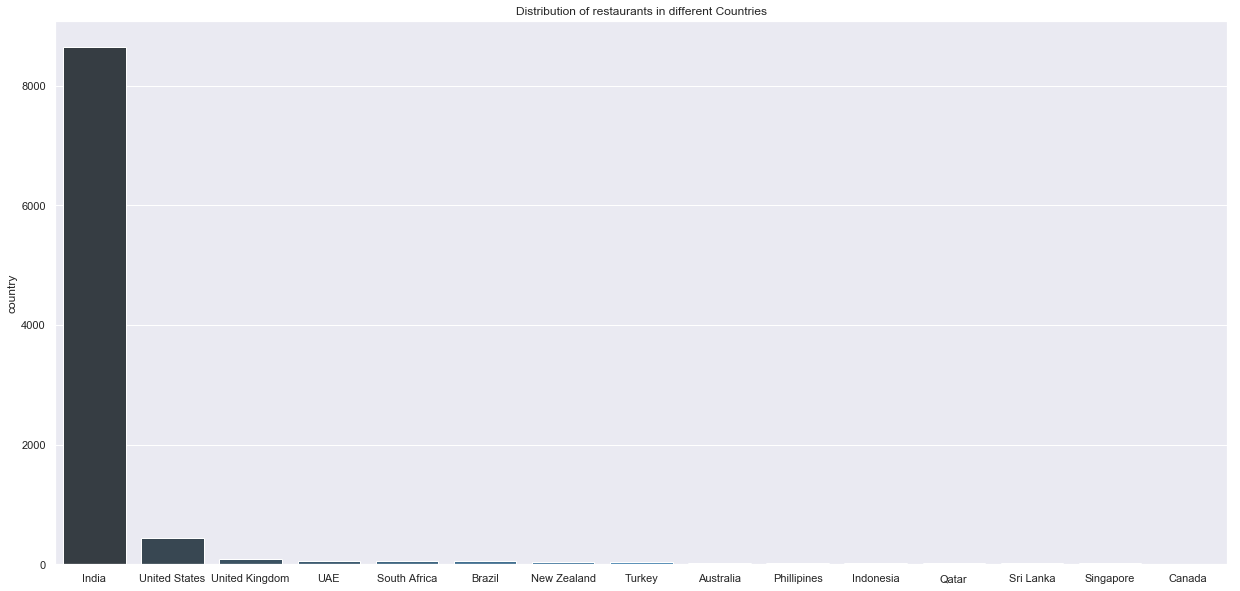

In [19]:
cnd=pd.DataFrame(full["country"].value_counts())
sns.barplot(x=cnd.index,y=cnd["country"],data=cnd,
            palette='Blues_d').set_title('Distribution of restaurants in different Countries')
fig = plt.gcf()
fig.set_size_inches(21,10)
plt.show()

In [20]:
full

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,No,No,No,No,3,4.4,Green,Very Good,336,Phillipines
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Yes,No,No,No,4,4.0,Green,Very Good,520,Phillipines
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Yes,No,No,No,4,4.2,Green,Very Good,677,Phillipines
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Yes,No,No,No,4,4.9,Dark Green,Excellent,621,Phillipines
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,532,Phillipines


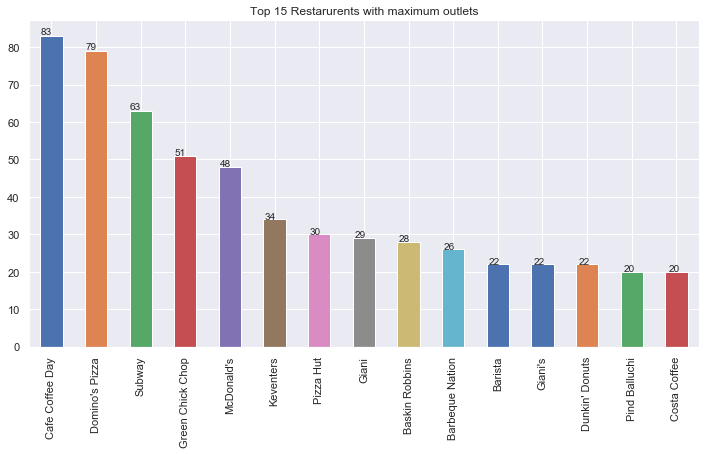

In [21]:
ax=zomato['restaurant_name'].value_counts().head(15).plot.bar(figsize =(12,6))
ax.set_title("Top 15 Restarurents with maximum outlets")
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() * 1.005, i.get_height() * 1.005))

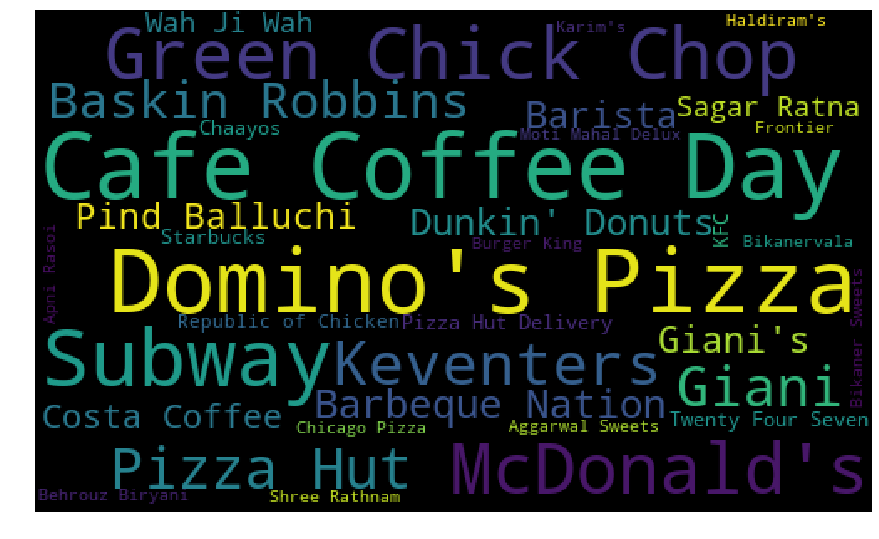

In [22]:
stopwords = set(STOPWORDS)

wordcloud = (WordCloud(width=500, height=300, relative_scaling=0.5, stopwords=stopwords).generate_from_frequencies(zomato['restaurant_name'].value_counts().head(35)))
fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Restaurant Distribution - Online Delivery')

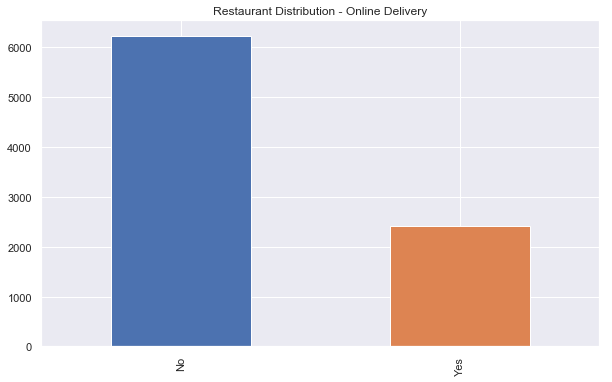

In [23]:
data.has_online_delivery.value_counts().plot.bar(figsize=(10,6))
plt.title('Restaurant Distribution - Online Delivery')

In [24]:
full.country.value_counts()

India             8652
United States      434
United Kingdom      80
UAE                 60
South Africa        60
Brazil              60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Sri Lanka           20
Singapore           20
Canada               4
Name: country, dtype: int64

In [25]:
full.loc[full['country']=='India'].city.value_counts().head(10)

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Lucknow           21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Name: city, dtype: int64

In [26]:
full.loc[full['country']=='India'].city.value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Lucknow           21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Bhopal            20
Chennai           20
Vizag             20
Agra              20
Ranchi            20
Jaipur            20
Puducherry        20
Dehradun          20
Bangalore         20
Coimbatore        20
Kochi             20
Mangalore         20
Patna             20
Nagpur            20
Ludhiana          20
Aurangabad        20
Pune              20
Varanasi          20
Allahabad         20
Indore            20
Kanpur            20
Mysore            20
Surat             20
Vadodara          20
Mumbai            20
Kolkata           20
Nashik            20
Goa               20
Hyderabad         18
Chandigarh        18
Secunderabad       2
Panchkula          1
Mohali             1
Name: city, dtype: int64

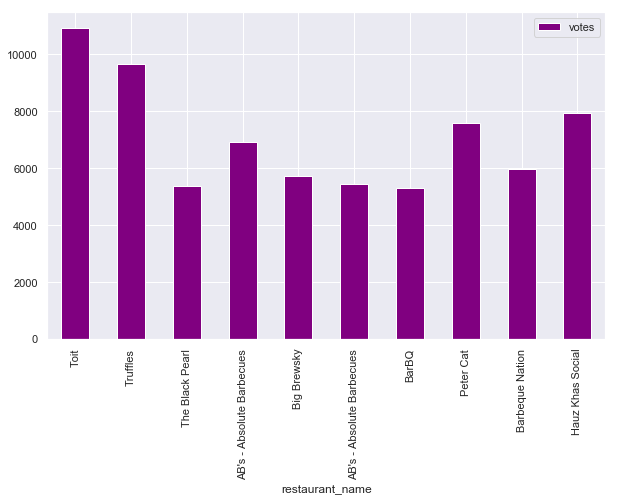

In [27]:
max_votes =full.votes.sort_values(ascending=False).head(10)
full.loc[full['votes'].isin(max_votes)][['restaurant_name','votes']]
full.loc[full['votes'].isin(max_votes)][['restaurant_name','votes']].plot.bar(x='restaurant_name', y='votes',
                                                                                  figsize = (10,6), color='purple')

(-1.105223862472434,
 1.1002487564425774,
 -1.1009306389165723,
 1.1093755648355168)

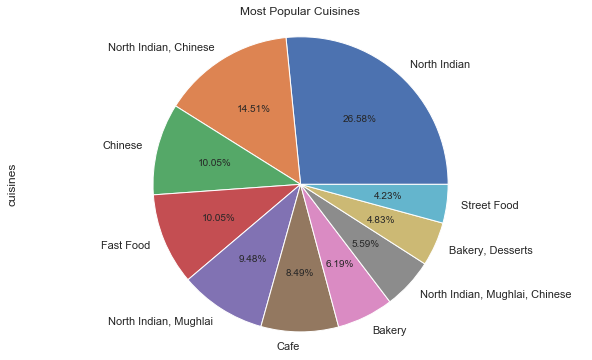

In [28]:
full['cuisines'].value_counts().sort_values(ascending=False).head(10)
full['cuisines'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',figsize=(10,6), 
title="Most Popular Cuisines", autopct='%1.2f%%')
plt.axis('equal')

In [29]:
zomato

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,currency,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [30]:
data


,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,India
629,3400325,MoMo Cafe,1,Agra,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",0.000000,0.000000,"North Indian, European",...,No,No,No,No,4,4.0,Green,Very Good,45,India
630,3400059,Peshawri - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,"North Indian, Mughlai",...,No,No,No,No,4,4.3,Green,Very Good,133,India
631,3400060,Taj Bano - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,Mughlai,...,No,No,No,No,4,4.0,Green,Very Good,41,India
632,3400348,G Thal,1,Agra,"3/20, KPS Tower, Near Tulsi Talkies, Bypass Ro...",Khandari,"Khandari, Agra",0.000000,0.000000,"Rajasthani, Gujarati, Mughlai",...,No,No,No,No,3,3.6,Yellow,Good,59,India
633,3400072,Dawat-e-Nawab - Radisson Blu,1,Agra,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,"North Indian, Mughlai",...,No,No,No,No,4,3.8,Yellow,Good,46,India


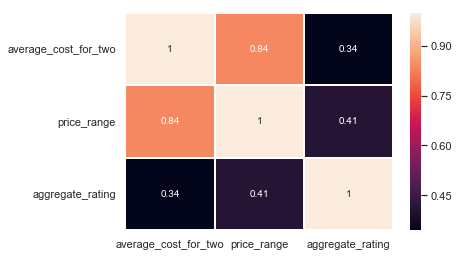

In [31]:
#Correlation among avg cost, price range, agg rating
corr = data[['average_cost_for_two', 'price_range', 'aggregate_rating']]
sns.heatmap(corr.corr(),annot=True,linewidth=1.0)

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


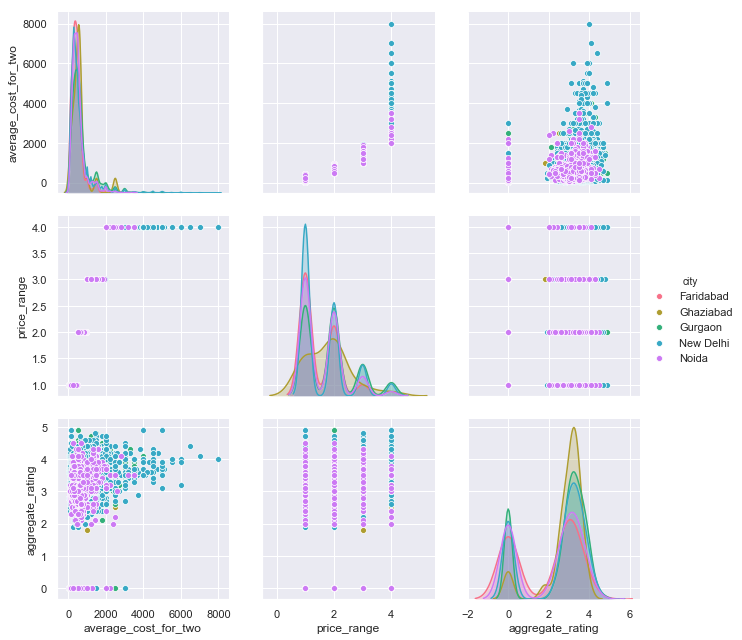

In [32]:
top5_indian_cities = ['New Delhi', 'Gurgaon', 'Noida','Faridabad', 'Ghaziabad']
city = full.loc[full['city'].isin(top5_indian_cities)]
pair = city[['average_cost_for_two', 'price_range', 'aggregate_rating', 'city']]
sns.pairplot(pair, size=3, hue='city', palette="husl")